lenX: 128


<IPython.core.display.Javascript object>


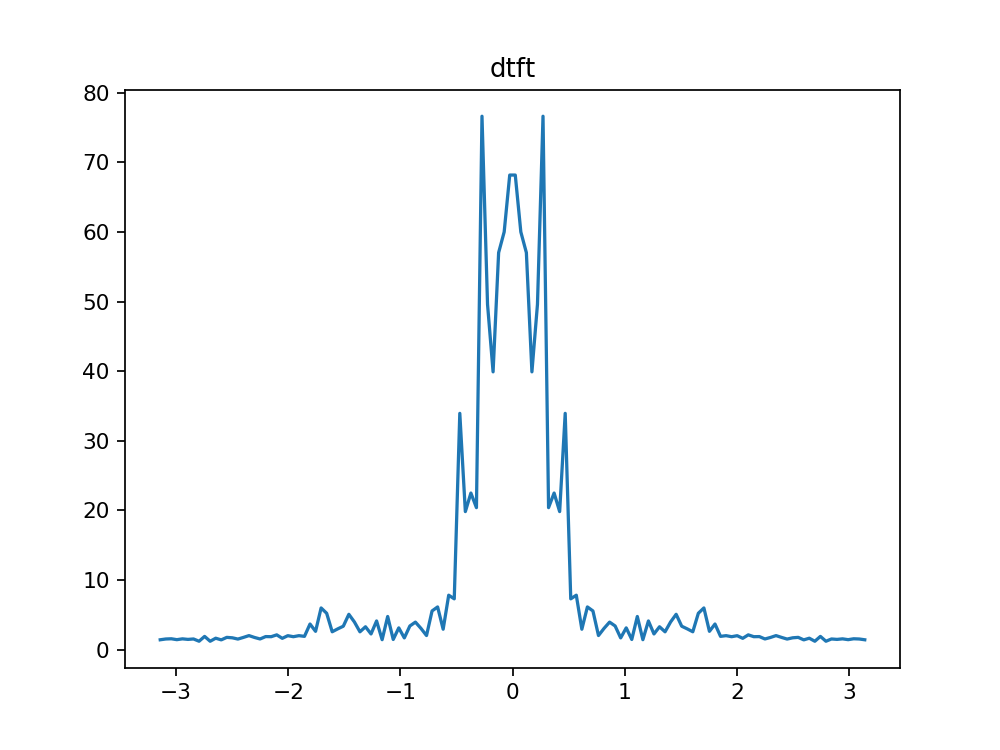

<IPython.core.display.Javascript object>


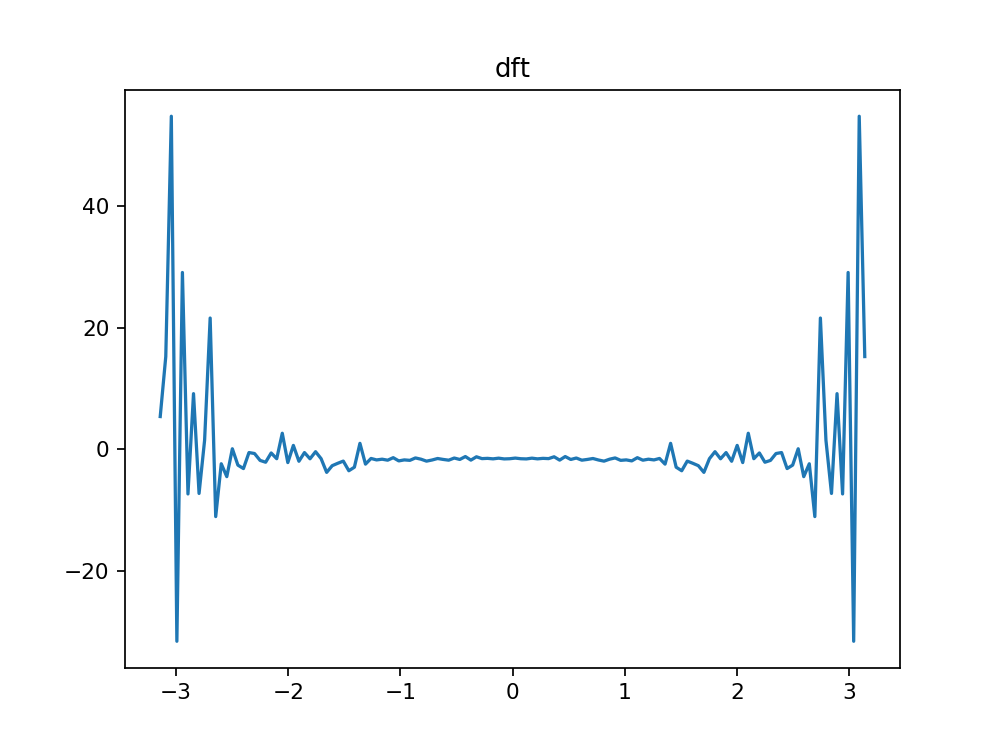

<IPython.core.display.Javascript object>


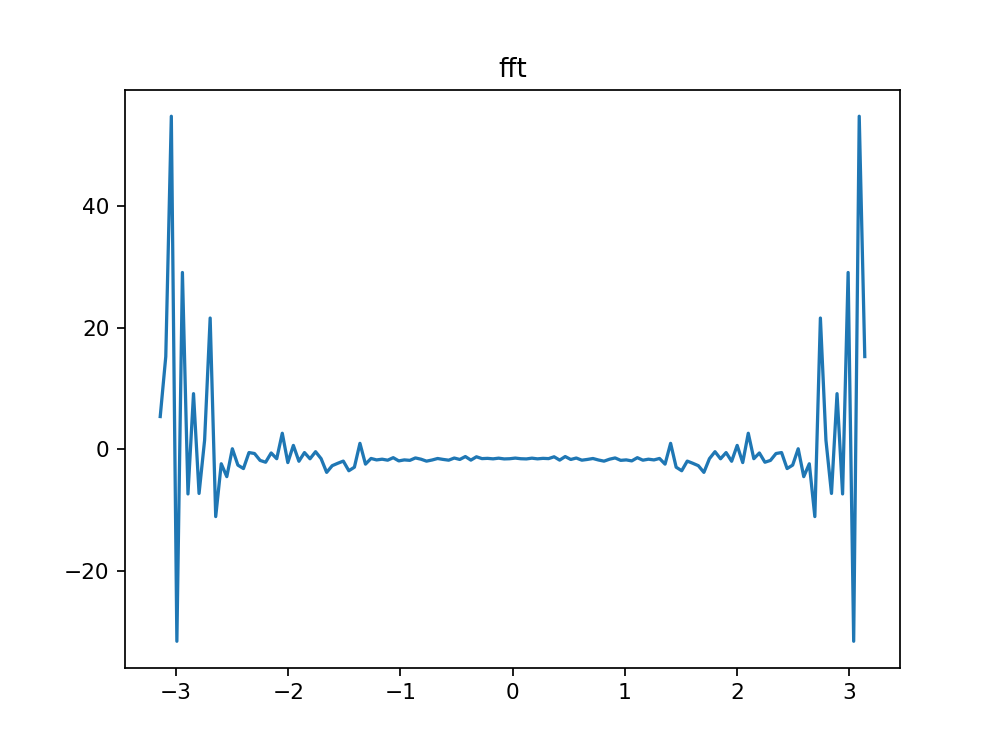

In [7]:
from cmath import exp, pi
import matplotlib.pyplot as plt
from numpy.fft import fftfreq
%matplotlib notebook
import numpy as np
import mpmath as mp
import scipy
import scipy.stats as sp
import matplotlib.pyplot as plt
import subprocess
import cmath as cm
x=[]
y=[]


def dtft(x1,N):

    x=x1[0]
    j=cm.sqrt(-1)
    n=x1[1]
    X=[]

    w=np.linspace(-np.pi,np.pi,N)
    for i in range(0,N):
        w_tmp=w[i]
        X_tmp=0
        for k in range(0,len(x)):
            X_tmp+=(x[k]*np.exp(-n[k]*w_tmp*j))


        X.append(abs(X_tmp))
    print("lenX:",len(X))
    return w,X

def dft(x,N):
    samples=[]
    for k in range(N):
        list=[]
        a=0
        for n in range(N):
            a=x[n]*cm.exp(-2j*cm.pi*k*n*(1/N))
            list.append(a)
            a=0
        summation=sum(list)
        samples.append(summation)
    #print("\nThe samples are:-\n[")
    #for i in range(N):
    #    print(samples[i]," ")
    #print("]")
    return samples

def fft(x1):
    N = len(x1)
    if N <= 1: return x1
    even = fft(x1[0::2])
    odd =  fft(x1[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]


f = open("Sample.norm", "r")
#print(f.read())
Nval=128
#print("\nEnter the values of the signal x[n]:\n")
for i in range(Nval):
    x.append(float(f.readline()))
#print(x)

for i in range(Nval):
    y.append(i)
x1=[x,y]
w,X=dtft(x1,Nval)

samples=dft(x,Nval)

plt.figure()
plt.title('dtft')
plt.plot(w,X)
#plt.show()
plt.figure()
plt.title('dft')
plt.plot(w,samples,label='dft')

plt.figure()
plt.title('fft')
plt.plot(w,fft(x),label='fft')

plt.show()
